# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
#dataset = get_dataset("/home/workspace/data/waymo/training_and_validation/*.tfrecord")

In [3]:
#dataset = get_dataset("/data/waymo/*.tfrecord")
# bounding boxes of above dataset is not correct

In [16]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


# Understand type of components of the dataset

In [5]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [6]:
for d in dataset:   
    print (type(d))
    print (d)
    break

<class 'dict'>
{'image': <tf.Tensor: shape=(640, 640, 3), dtype=uint8, numpy=
array([[[248, 252, 251],
        [249, 253, 252],
        [250, 254, 253],
        ...,
        [219, 244, 249],
        [217, 241, 253],
        [212, 235, 249]],

       [[248, 252, 251],
        [249, 253, 252],
        [250, 254, 253],
        ...,
        [218, 243, 250],
        [217, 241, 253],
        [215, 238, 252]],

       [[248, 252, 251],
        [249, 253, 252],
        [250, 254, 253],
        ...,
        [216, 240, 250],
        [215, 239, 251],
        [216, 240, 252]],

       ...,

       [[ 69,  82,  91],
        [ 71,  84,  93],
        [ 70,  83,  92],
        ...,
        [ 65,  78,  87],
        [ 60,  73,  81],
        [ 68,  81,  89]],

       [[ 68,  81,  90],
        [ 67,  80,  89],
        [ 67,  79,  91],
        ...,
        [ 85,  99, 108],
        [ 76,  90,  99],
        [ 96, 110, 119]],

       [[ 68,  81,  90],
        [ 64,  77,  86],
        [ 65,  77,  89],
        .

# Plot a sample image from dataset

<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>
<class 'dict'>
dict_keys(['image', 'source_id', 'key', 'filename', 'groundtruth_image_confidences', 'groundtruth_verified_neg_classes', 'groundtruth_not_exhaustive_classes', 'groundtruth_boxes', 'groundtruth_area', 'groundtruth_is_crowd', 'groundtruth_difficult', 'groundtruth_group_of', 'groundtruth_weights', 'groundtruth_classes', 'groundtruth_image_classes', 'original_image_spatial_shape'])
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
img_shape (640, 640, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
0.5338909 0.49441653 0.5447464 0.5023114
341.69017791748047 316.4265823364258 348.6376953125 321.4793014526367
0.5333975 0.5098773 0.5393186 0.5164564
341.37439727783203 326.3214874267578 345.1639175415039 330.53211212158203
0.5575755 0.21175916 0.6355391 0.28857133
356.8483352661133 135.52586555480957 406.74503326416016 184.68564987182617
0.5319174 0.4657

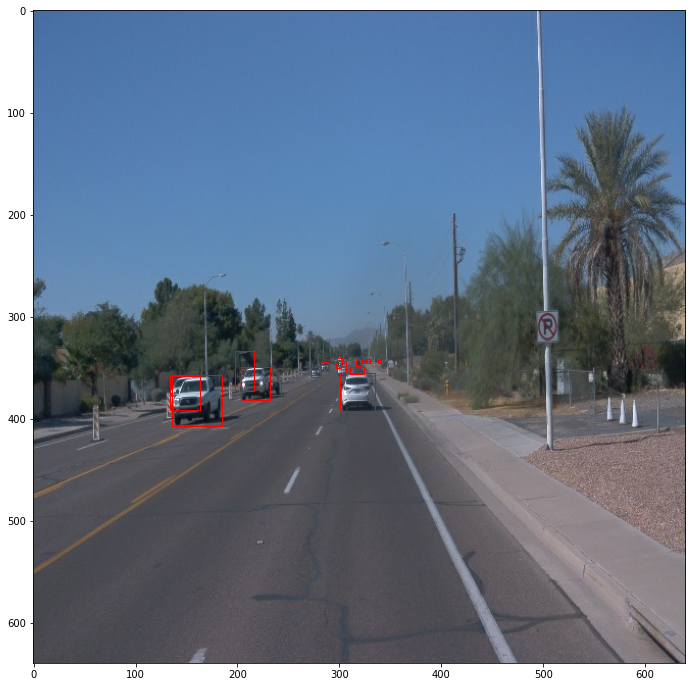

In [7]:
d=dataset.take(1)
print(type(d))
for n in d:
    print (type(n))
    print (n.keys())
    img =n['image']
    print (type(img))
    np_image = img.numpy()
    print (type(np_image))
    fig,ax= plt.subplots(1,figsize=(12,12))
    ax.imshow(np_image)
    img_shape = np_image.shape
    print ('img_shape',img_shape)
    height = img_shape[0]
    width = img_shape[1]
    groundtruth_boxes = n['groundtruth_boxes']
    print (type(groundtruth_boxes))
    np_groundtruth_boxes = groundtruth_boxes.numpy()
    print (type(np_groundtruth_boxes))
    for b in np_groundtruth_boxes:
        y1,x1,y2,x2= b
        print (y1,x1,y2,x2)
        scaled_x1=x1*width
        scaled_x2=x2*width
        scaled_y1=y1*height
        scaled_y2=y2*height
        print (scaled_y1,scaled_x1,scaled_y2,scaled_x2)
        rect = patches.Rectangle((scaled_x1,scaled_y1),scaled_x2-scaled_x1,scaled_y2-scaled_y1,
                                 linewidth=1,edgecolor='r',
                                facecolor='none')
        ax.add_patch(rect)
        
    plt.show()
    
    

In [8]:
#find labels
!cat label_map.pbtxt

item {
    id: 1
    name: 'vehicle'
}

item {
    id: 2
    name: 'pedestrian'
}

item {
    id: 4
    name: 'cyclist'
}



## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [17]:
def display_images(batch):
    i=0
    fig,ax= plt.subplots(5,2,figsize=(18,22))
    
    for n in batch:

        img =n['image']
        np_image = img.numpy()
        
        
        ax1= i%5
        ax2=i%2
        i+=1
        
        ax[ax1, ax2].imshow(np_image)
        img_shape = np_image.shape
        height = img_shape[0]
        width = img_shape[1]
        groundtruth_boxes = n['groundtruth_boxes']
        np_groundtruth_boxes = groundtruth_boxes.numpy()
        np_groundtruth_classes = n['groundtruth_classes'].numpy()
        for b,c in zip(np_groundtruth_boxes,np_groundtruth_classes):
            y1,x1,y2,x2= b
            #print (y1,x1,y2,x2)
            scaled_x1=x1*width
            scaled_x2=x2*width
            scaled_y1=y1*height
            scaled_y2=y2*height
            #vehicles in red, pedestrians in blue, cyclist in green
            # 1- vehicle,2-pedestrians, 4-cyclist
            if c==1:
                edgecolor='r'
            elif c==2:
                edgecolor='b'
            elif c==4:
                edgecolor='g'
            
            rect = patches.Rectangle((scaled_x1,scaled_y1),scaled_x2-scaled_x1,scaled_y2-scaled_y1,
                                     linewidth=1,edgecolor=edgecolor,
                                    facecolor='none')
            ax[ax1, ax2].add_patch(rect)
            
        ax[ax1, ax2].axis('off')
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

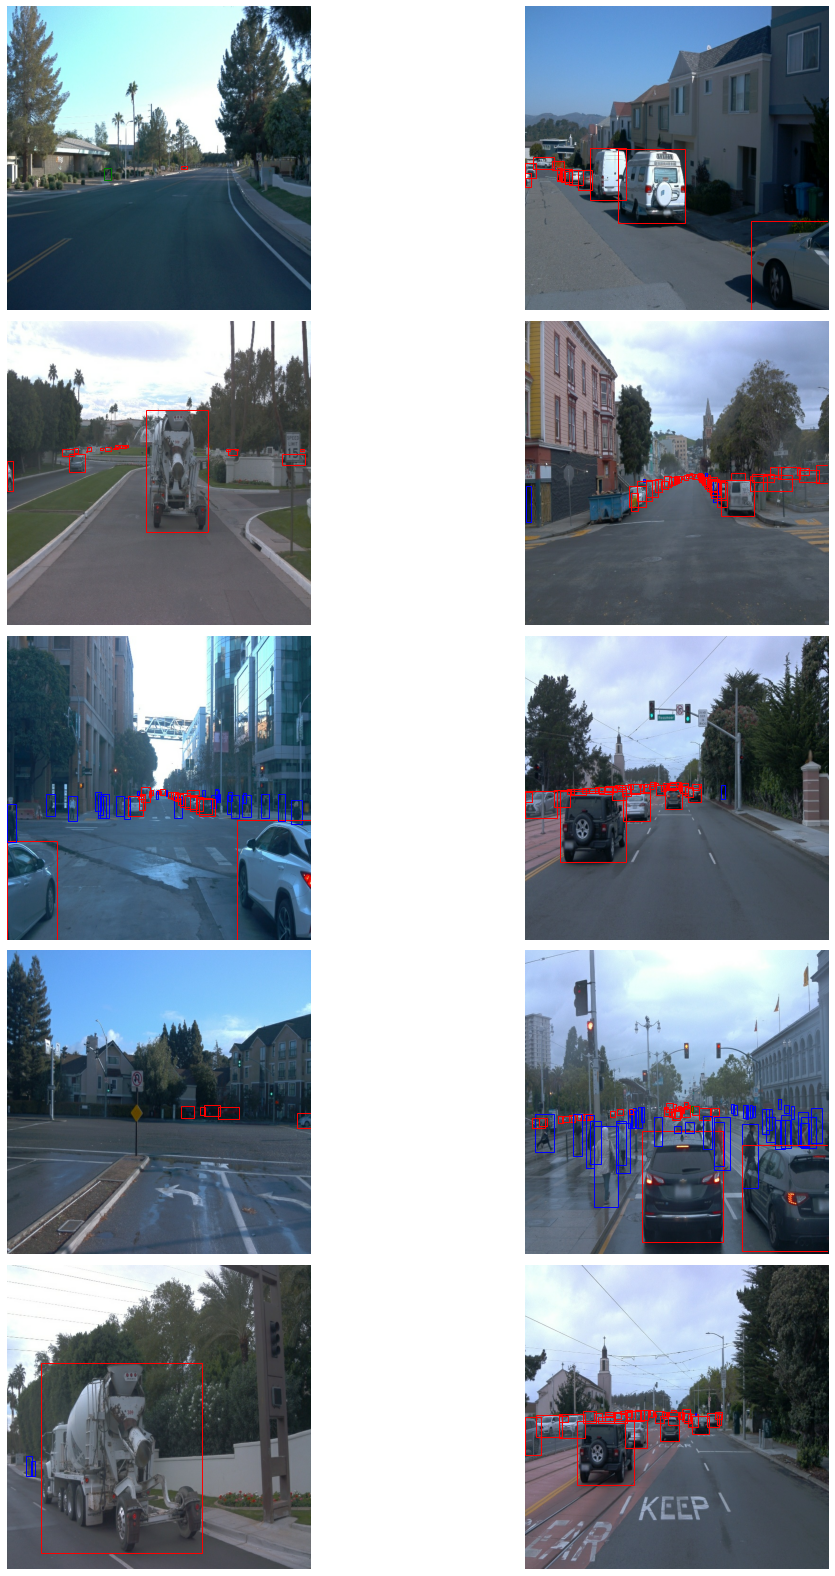

In [12]:
# Display 10 random images in dataset
image_batch = dataset.shuffle(150).take(10)
display_images(image_batch)

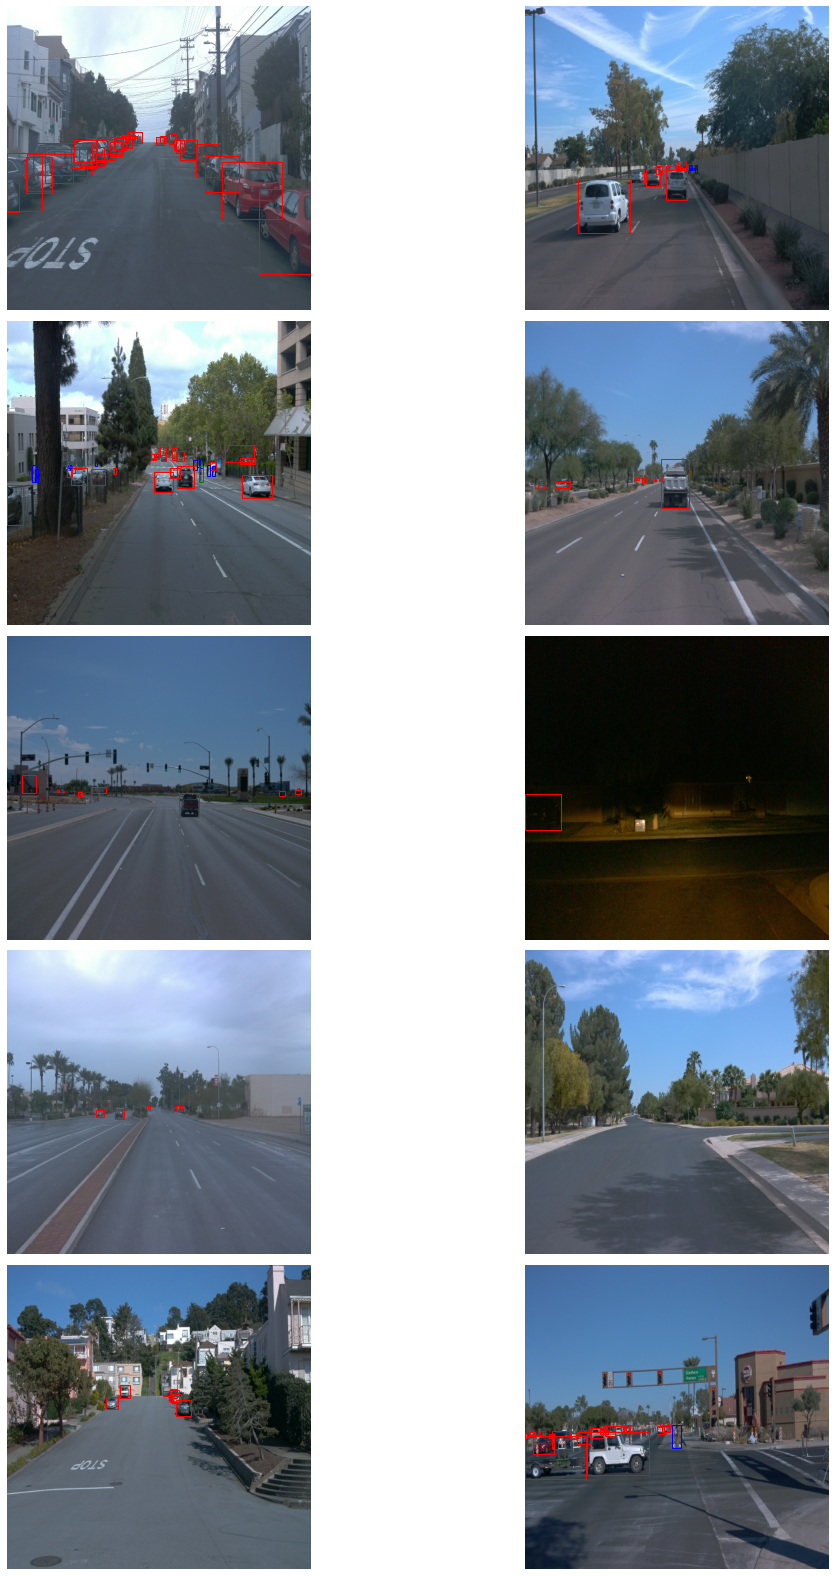

In [25]:
image_batch = dataset.shuffle(20).take(10)
display_images(image_batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

# EDA 2 : Find class distribution

It will be helpful to know how the data is distributed among each class like vehicles,pedestrians, cyclist.
We can look at count of each class detected in the grountruth classes.
It will help us to get idea about the driving conditions and data we are looking at.
We can also use it later on, to validate if our detection/inference finds similar data distribution

In [37]:
def find_class_count_in_images(batch):

    count_dict={}
    count_dict['vehicles']=0
    count_dict['pedestrians']=0
    count_dict['cyclist']=0
    
    for n in batch:

   
        np_groundtruth_classes = n['groundtruth_classes'].numpy()
        for c in np_groundtruth_classes:
            if c ==1:
                count_dict['vehicles'] +=1
            elif c ==2:
                count_dict['pedestrians'] +=1
            elif c==4:
                count_dict['cyclist'] +=1
            # 1- vehicle,2-pedestrians, 4-cyclist
            
    print ('count_dict',count_dict)
    return count_dict



In [38]:
# find_class_count_in_images
class_batch = dataset.shuffle(150).take(100)
count_dict = find_class_count_in_images(class_batch)

count_dict {'vehicles': 1899, 'pedestrians': 493, 'cyclist': 12}


In [3]:
dict_length = len(count_dict)
dict_values = count_dict.values()
dict_values_list = list(dict_values)
dict_keys_list = list(count_dict.keys())

([<matplotlib.axis.XTick at 0x7f6ebee64cf8>,
 [Text(0, 0, 'vehicles'), Text(1, 0, 'pedestrians'), Text(2, 0, 'cyclist')])

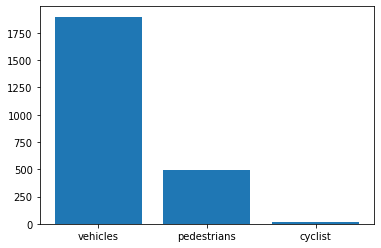

In [7]:
plt.bar(range(dict_length), dict_values_list)
plt.xticks(range(dict_length), dict_keys_list)

# EDA 3 : Find Bounding box details

It will be useful if we find more details about the groundtruth bounding boxes.

1. We can count the average number of bounding boxes per image
2. We can find the area of the bounding boxes for each of the class type. We can find area for vehicles, pedstrians and cyclists.

Later on, It will help us to find any amomalies with our detection.
    


In [40]:
def find_bounding_box_details(batch):
    # TODO - Your implementation here

    area_dict = {}
    area_dict['vehicles'] = 0
    area_dict['pedestrians'] = 0
    area_dict['cyclist'] = 0
    i = 0
    bbox_count_overall = 0
    cnt_veh = 0
    cnt_ped = 0
    cnt_cyc = 0
    
    for n in batch:
        img = n['image']
        #print (type(img))
        np_image = img.numpy()
        #print (type(np_image))
        

        i+=1
        #print(ax1,ax2)
        

        img_shape = np_image.shape
        #print ('img_shape',img_shape)
        height = img_shape[0]
        width = img_shape[1]
        groundtruth_boxes = n['groundtruth_boxes']
        #print (type(groundtruth_boxes))
        np_groundtruth_boxes = groundtruth_boxes.numpy()
        #print (type(np_groundtruth_boxes))
   
        np_groundtruth_classes = n['groundtruth_classes'].numpy()
        for b,c in zip(np_groundtruth_boxes,np_groundtruth_classes):
            bbox_count_overall += 1
            y1,x1,y2,x2= b
            #print (y1,x1,y2,x2)
            scaled_x1=x1*width
            scaled_x2=x2*width
            scaled_y1=y1*height
            scaled_y2=y2*height
            area = abs(scaled_x2 - scaled_x1) * abs(scaled_y2 - scaled_y1)
        
            if c ==1:
                area_dict['vehicles'] += area
                cnt_veh += 1
            elif c ==2:
                area_dict['pedestrians'] += area
                cnt_ped += 1
            elif c==4:
                area_dict['cyclist'] += area
                cnt_cyc += 1
            # 1- vehicle,2-pedestrians, 4-cyclist
            
    print ('area_dict',area_dict)
    print ('bbox_count_overall',bbox_count_overall)
    print ('cnt_veh',cnt_veh)
    print ('cnt_ped',cnt_ped)
    print ('cnt_cyc',cnt_cyc)
    bbox_ave_count = bbox_count_overall/i
    print ('bbox_ave_count',bbox_ave_count)
    area_dict['vehicles'] = area_dict['vehicles'] / cnt_veh
    area_dict['pedestrians'] = area_dict['pedestrians'] / cnt_ped
    area_dict['cyclist'] = area_dict['cyclist'] / cnt_cyc
    print ('area_dict',area_dict)
    return bbox_count_overall, area_dict

In [52]:
box_batch = dataset.shuffle(350).take(200)
bbox_count_overall, area_dict = find_bounding_box_details(box_batch)

area_dict {'vehicles': 6808536.266972656, 'pedestrians': 581323.631386506, 'cyclist': 27279.31406810501}
bbox_count_overall 3693
cnt_veh 2990
cnt_ped 674
cnt_cyc 29
bbox_ave_count 18.465
area_dict {'vehicles': 2277.1024304256375, 'pedestrians': 862.497969416181, 'cyclist': 940.6660023484486}


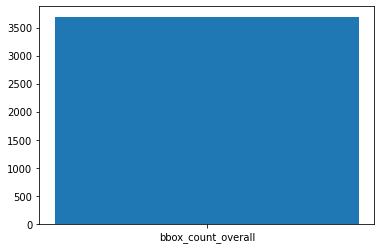

In [11]:
plt.bar(1,bbox_count_overall, tick_label=['bbox_count_overall'])
plt.show()

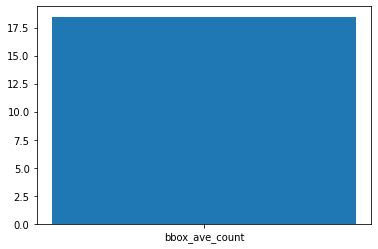

In [9]:
plt.bar(1,bbox_ave_count, tick_label=['bbox_ave_count'])
plt.show()

In [14]:
area_dict_length = len(area_dict)
area_dict_values = area_dict.values()
area_dict_values_list = list(area_dict_values)
area_dict_keys_list = list(area_dict.keys())

([<matplotlib.axis.XTick at 0x7f6ebed87860>,
 [Text(0, 0, 'vehicles'), Text(1, 0, 'pedestrians'), Text(2, 0, 'cyclist')])

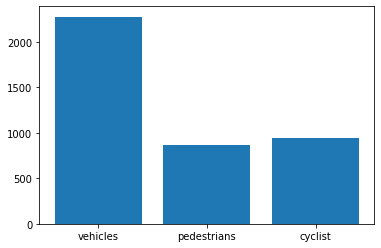

In [15]:
plt.bar(range(area_dict_length), area_dict_values_list)
plt.xticks(range(area_dict_length), area_dict_keys_list)